In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
ds=xr.open_dataset('C:/Users/awuni/Downloads/ebc0207f8df57b55815c9d5884ec2f0f/data_stream-oper.nc') 

In [3]:
ds

<xarray.Dataset>
Dimensions:     (valid_time: 8760, latitude: 29, longitude: 20)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2023-01-01 ... 2023-12-31T23:00:00
  * latitude    (latitude) float64 11.33 11.08 10.83 10.58 ... 4.83 4.58 4.33
  * longitude   (longitude) float64 -3.61 -3.36 -3.11 -2.86 ... 0.64 0.89 1.14
    expver      (valid_time) object ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
    tp          (valid_time, latitude, longitude) float32 ...
    tcc         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-04T12:35 GRIB to CDM+CF via cfgrib-0.9.1...

In [4]:
t2m = ds['t2m'].values
tp = ds['tp'].values 
tcc= ds['tcc'].values

In [5]:
t2m_ds = t2m.reshape(-1, 29 * 20)  # Flattening the first dimension
tp_ds = tp.reshape(-1, 29 * 20)  # Flattening the first dimension

### Single Linear Regression

In [6]:
lm = LinearRegression()

X = tp_ds
Y = t2m_ds

lm.fit(X,Y)

Yhat=lm.predict(X)

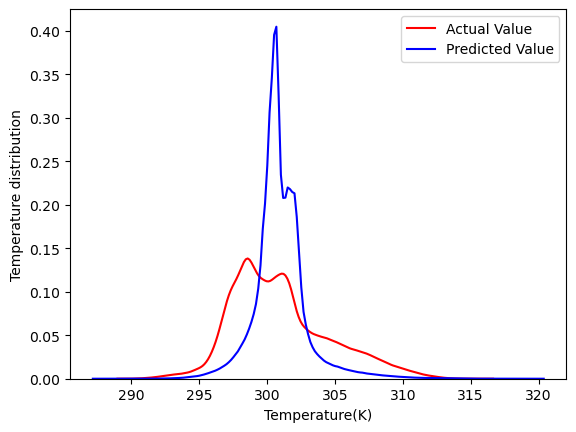

In [7]:
ax1 = sns.distplot(t2m_ds, hist=False, color="r", label="Actual Value")

# Creating a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

#plt.title('Actual vs Fitted Values for Temperature')
plt.xlabel('Temperature(K)')
plt.ylabel('Temperature distribution')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

### Evaluating the Mean Squared Error and R^2 score values for the model.

In [8]:
mse_slr = mean_squared_error(t2m_ds, Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.2633024291908639
The mean square error of price and predicted value is:  9.346641


### Multiple Linear Regression

In [9]:
tcc_ds = tcc.reshape(-1, 29 * 20)  # Flattening the first dimension

In [10]:
lm2 = LinearRegression()
Z = np.column_stack((tp_ds, tcc_ds))
lm2.fit(Z,Y)
Y_hat1 = lm2.predict(Z)

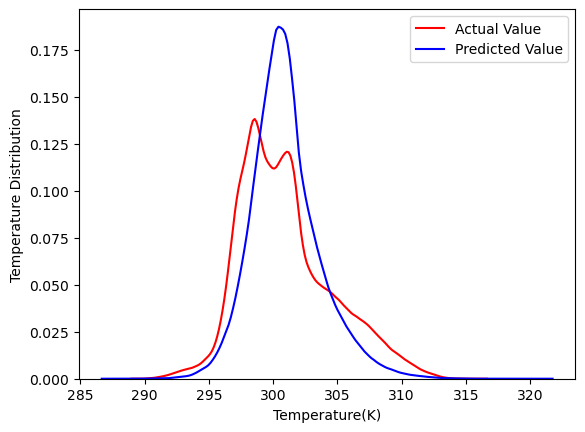

In [11]:
ax1 = sns.distplot(t2m_ds, hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat1, hist=False, color="b", label="Fitted Values" , ax=ax1)

#plt.title('Actual vs Fitted Values for Temperature')
plt.xlabel('Temperature(K)')
plt.ylabel('Temperature Distribution')
plt.legend(['Actual Value', 'Predicted Value'])

###  The R^2 score and the MSE value for this fit

In [12]:
mse_slr = mean_squared_error(t2m_ds, Y_hat1)
r2_score_slr = lm2.score(Z, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.5189870909387375
The mean square error of price and predicted value is:  6.093554
